In [5]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set_ov2_no_mismatch.csv')
test_set = pd.read_csv('./outputs/train_set_ov2_no_mismatch.csv')

In [10]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [11]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [12]:
y_cross_scores = cross_val_score(clf, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

77.66% accuracy with a standard deviation of 3.07%


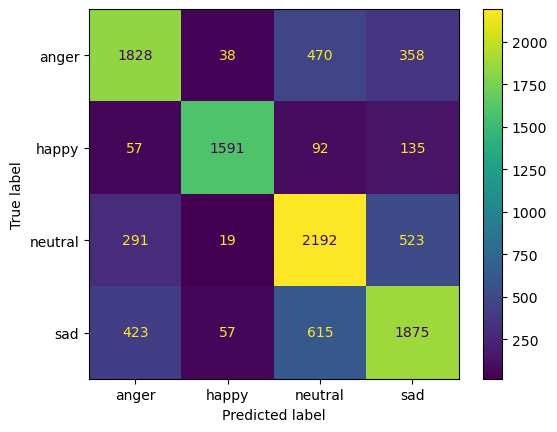

In [13]:
y_cross_predict = cross_val_predict(clf, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=clf.classes_)
y_cross_display.plot()

In [14]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(clf.score(x_test, y_test) * 100))

The mean accuracy of the given test data and labels is: 76.84%
